In [ ]:
#start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [19]:
from pandas_datareader import data

In [5]:
from datetime import datetime

using Yahoo and pandas to grab some data for some tech stocks.

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
# Set up End and Start times for data grab
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [20]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
  globals()[stock] = data.DataReader(stock,'yahoo',start,end)



In [41]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2021-05-10,129.539993,126.809998,129.410004,126.849998,88071200.0,126.129387,NaN,NaN,NaN
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.194740,NaN,NaN,NaN
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.072571,NaN,NaN,NaN
2021-05-13,126.150002,124.260002,124.580002,124.970001,105861300.0,124.260078,NaN,NaN,NaN
2021-05-14,127.889999,125.849998,126.250000,127.449997,81918000.0,126.725990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-03,160.710007,156.320007,158.149994,159.479996,88966500.0,159.246017,160.805731,164.813344,165.219250
2022-05-04,166.479996,159.259995,159.669998,166.020004,108256500.0,165.776428,160.684909,164.362007,165.253200
2022-05-05,164.080002,154.949997,163.850006,156.770004,130525300.0,156.540009,159.721326,163.610112,165.187296


In [23]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,155.723479,152.385652,153.960870,154.130830,8.714105e+07,153.613101
std,15.798791,15.007801,15.457617,15.402732,2.566113e+07,15.543669
min,124.639999,122.250000,123.160004,122.769997,4.100000e+07,122.072571
25%,146.330002,143.630005,144.380005,145.399994,6.902390e+07,144.693329
50%,153.490005,150.160004,151.449997,151.830002,8.246540e+07,151.193680
75%,169.679993,165.500000,167.479996,166.559998,1.000779e+08,166.315643
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [25]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-05-10 to 2022-05-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

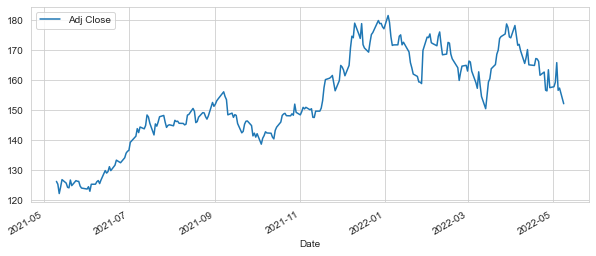

In [26]:
# Let's see a historical view of the closing price.
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

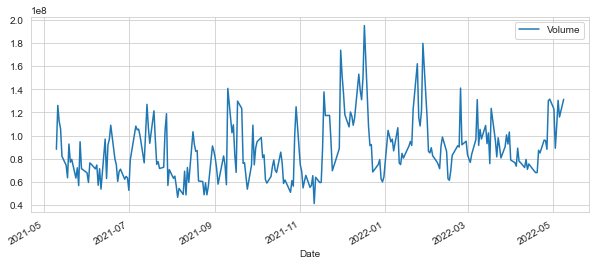

In [27]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

moving average: Basically we take all the prices over certain time period and average them out

In [35]:
#Calculating different moving AVGS
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()
    

<AxesSubplot:xlabel='Date'>

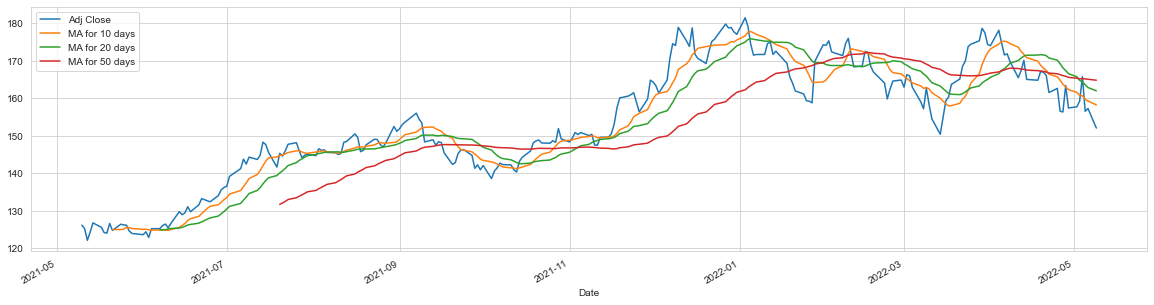

In [48]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,5))


Finding: The more days you take in the moving averages, the smoother the line in the plot

# Now, We are going to dive a little deeper with the daily returns.

<AxesSubplot:xlabel='Date'>

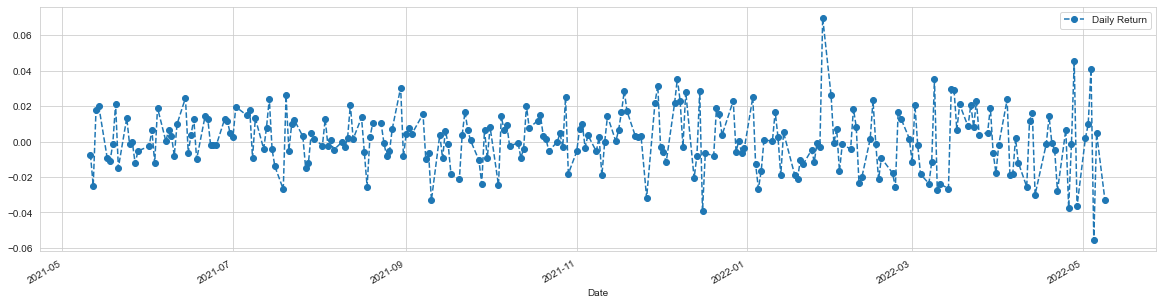

In [55]:
#Creating ne column called 'Daily Return' which is equal to the percentage change in the 'Adj Close' column
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(20,5),legend = True,linestyle='--', marker='o')

What if we wanted to see AVG Daily Returns? Then, its histograms job to be done now.

/Users/omarabdelaleem/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

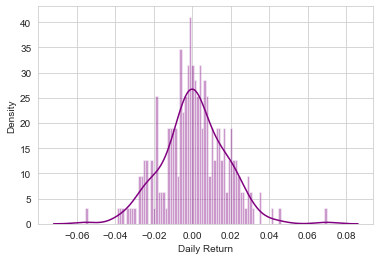

In [67]:
#This one is using Seaborn to do the plotting and it's adding KDE as well to the plot
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


<AxesSubplot:>

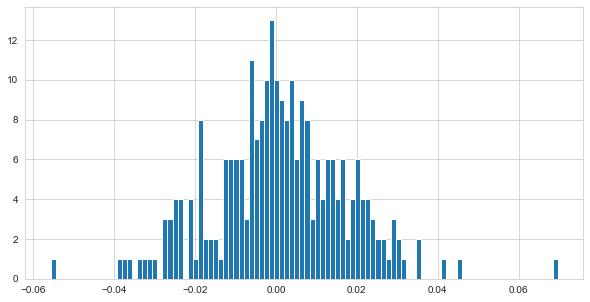

In [73]:
#.hist is pandas built in
AAPL['Daily Return'].hist(bins=100,figsize=(10,5))

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [75]:
closing_df=data.DataReader(tech_list,'yahoo',start,end)['Adj Close']


In [76]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-05-10,126.129387,2341.659912,245.182877,3190.489990
2021-05-11,125.194733,2308.760010,244.240540,3223.909912
2021-05-12,122.072571,2239.080078,237.068985,3151.939941
2021-05-13,124.260071,2261.969971,241.066406,3161.469971
2021-05-14,126.725983,2316.159912,246.145050,3222.899902


In [77]:
tech_rets = closing_df.pct_change()

In [78]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-05-10,NaN,NaN,NaN,NaN
2021-05-11,-0.007410,-0.014050,-0.003843,0.010475
2021-05-12,-0.024938,-0.030181,-0.029363,-0.022324
2021-05-13,0.017920,0.010223,0.016862,0.003024
2021-05-14,0.019845,0.023957,0.021067,0.019431


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

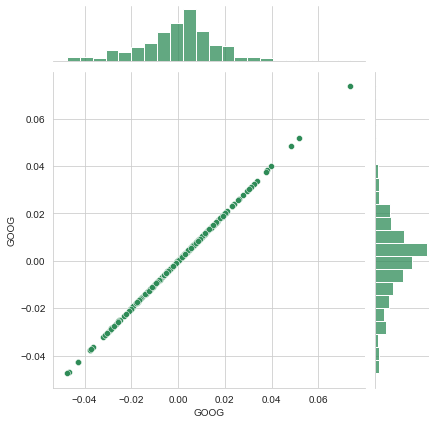

In [86]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

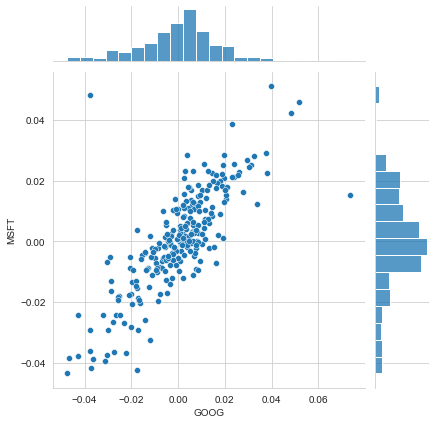

In [91]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',legend=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

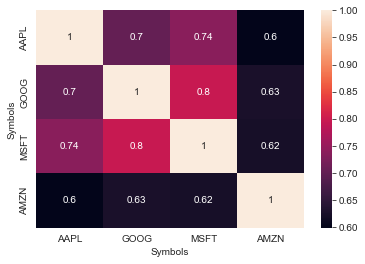

In [89]:
sns.heatmap(tech_rets.corr(), annot = True)

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

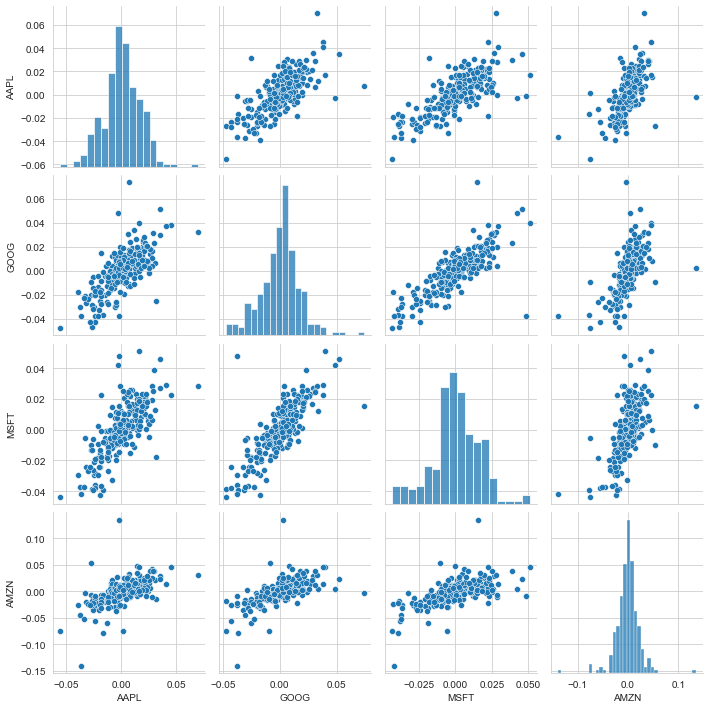

In [95]:
# We can simply call "pairplot" on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(data=tech_rets,dropna=True)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Microsoft daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

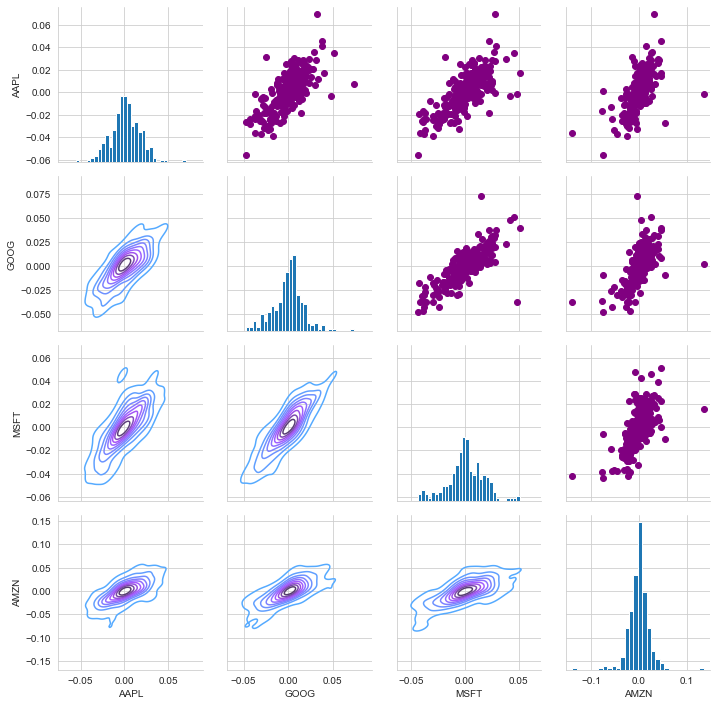

In [100]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

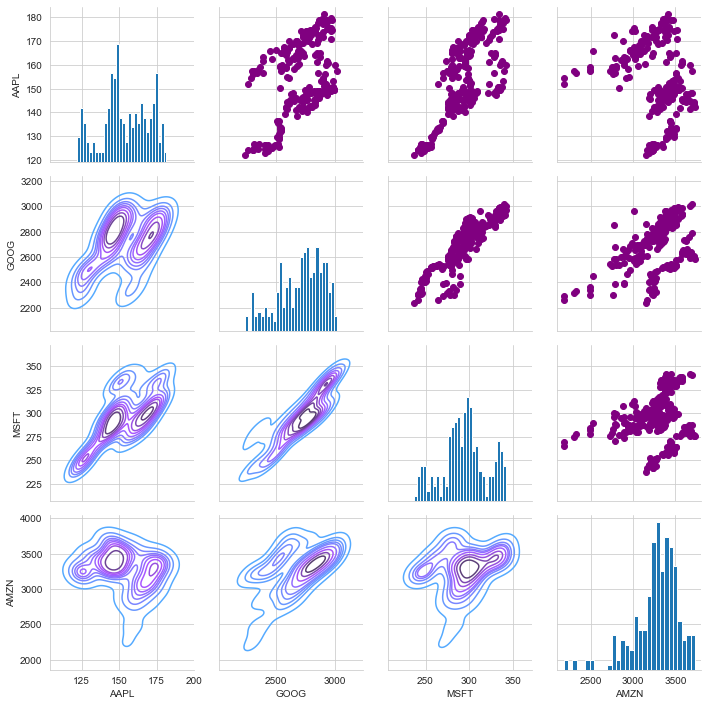

In [102]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

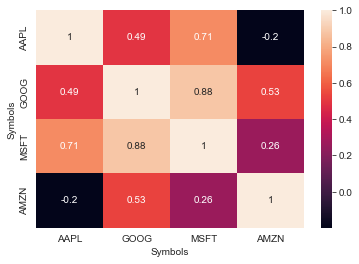

In [108]:
#Better Visibility on closing prices correlation.
sns.heatmap(closing_df.corr(),annot=True)

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.


Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

In [111]:
rets = tech_rets.dropna()



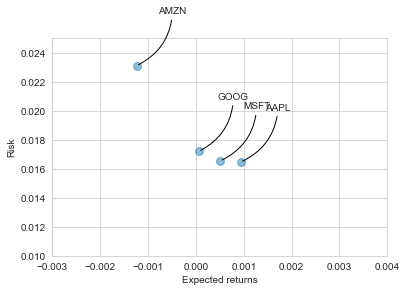

In [127]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))